## Context
### This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Content
### The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

## Inspiration
### Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

In [1]:
import pandas as pd

In [3]:
Diabetes = pd.read_csv("../input/diabetes.csv")

In [4]:
Diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Binary classification problem

### We need to clean the data by normalizing it 

In [5]:
Diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
colums_to_norm = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction']

In [9]:
Diabetes[colums_to_norm] = Diabetes[colums_to_norm].apply(lambda x : (x - x.min()) / (x.max() - x.min()))

In [10]:
Diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1


In [11]:
import tensorflow as tf

In [12]:
num_preg = tf.feature_column.numeric_column('Pregnancies')
plasma_gluc = tf.feature_column.numeric_column('Glucose')
blood_press = tf.feature_column.numeric_column('BloodPressure')
tricep = tf.feature_column.numeric_column('SkinThickness')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('DiabetesPedigreeFunction')
age = tf.feature_column.numeric_column('Age')

## The Age feature column wasn't normalized as we can use this data in a better way by grouping age groups into buckets

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

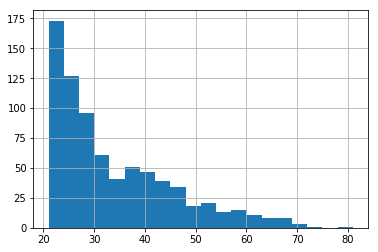

In [14]:
Diabetes['Age'].hist(bins = 20)

## Creating the age buckets

In [15]:
age_bucket = tf.feature_column.bucketized_column(age, boundaries = [20, 30, 40, 50, 60, 70, 80])

In [16]:
feat_cols = [num_preg, plasma_gluc, blood_press, tricep, insulin, bmi, diabetes_pedigree, age_bucket]

## Let's split the data into training and test sets

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
x_data = Diabetes.drop('Outcome', axis = 1)

In [20]:
x_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33


In [21]:
y_data = Diabetes['Outcome']

In [22]:
y_data.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3)

## Creating the input functions

In [24]:
input_func = tf.estimator.inputs.pandas_input_fn(x = X_train, y = y_train, batch_size = 16, num_epochs = 1000, shuffle = True)

In [25]:
model = tf.estimator.LinearClassifier(feature_columns = feat_cols, n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmplq97frb0', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fe093583da0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [41]:
model.train(input_fn = input_func, steps = 10000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmplq97frb0/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1000 into /tmp/tmplq97frb0/model.ckpt.
INFO:tensorflow:loss = 6.78952, step = 1001
INFO:tensorflow:global_step/sec: 297.866
INFO:tensorflow:loss = 7.37066, step = 1101 (0.336 sec)
INFO:tensorflow:global_step/sec: 478.285
INFO:tensorflow:loss = 6.617, step = 1201 (0.209 sec)
INFO:tensorflow:global_step/sec: 487.586
INFO:tensorflow:loss = 8.54723, step = 1301 (0.205 sec)
INFO:tensorflow:global_step/sec: 509.47
INFO:tensorflow:loss = 5.69714, step = 1401 (0.196 sec)
INFO:tensorflow:global_step/sec: 486.688
INFO:tensorflow:loss = 6.22456, step = 1501 (0.205 sec)
INFO:tensorflow:global_step/sec: 471.424
INFO:tensorflow:loss = 8.21747, step = 1601

INFO:tensorflow:loss = 7.78075, step = 9101 (0.216 sec)
INFO:tensorflow:global_step/sec: 452.338
INFO:tensorflow:loss = 8.16869, step = 9201 (0.221 sec)
INFO:tensorflow:global_step/sec: 457.808
INFO:tensorflow:loss = 6.23966, step = 9301 (0.218 sec)
INFO:tensorflow:global_step/sec: 458.906
INFO:tensorflow:loss = 9.65288, step = 9401 (0.218 sec)
INFO:tensorflow:global_step/sec: 511.146
INFO:tensorflow:loss = 4.9268, step = 9501 (0.196 sec)
INFO:tensorflow:global_step/sec: 456.276
INFO:tensorflow:loss = 6.6671, step = 9601 (0.219 sec)
INFO:tensorflow:global_step/sec: 453.113
INFO:tensorflow:loss = 9.1347, step = 9701 (0.221 sec)
INFO:tensorflow:global_step/sec: 456.024
INFO:tensorflow:loss = 7.30194, step = 9801 (0.219 sec)
INFO:tensorflow:global_step/sec: 464.351
INFO:tensorflow:loss = 4.40492, step = 9901 (0.216 sec)
INFO:tensorflow:global_step/sec: 452.406
INFO:tensorflow:loss = 8.96315, step = 10001 (0.221 sec)
INFO:tensorflow:global_step/sec: 451.555
INFO:tensorflow:loss = 6.12268, 

 ## We created a model using Linear Classifier, now let's test it

In [42]:
test_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test, y = y_test, batch_size = 16, num_epochs = 1, shuffle = False)

In [43]:
results = model.evaluate(test_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-05-19-04:50:16
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmplq97frb0/model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-05-19-04:50:17
INFO:tensorflow:Saving dict for global step 11000: accuracy = 0.748918, accuracy_baseline = 0.649351, auc = 0.780988, auc_precision_recall = 0.643692, average_loss = 0.53516, global_step = 11000, label/mean = 0.350649, loss = 8.24147, precision = 0.676923, prediction/mean = 0.353049, recall = 0.54321


In [44]:
results

{'accuracy': 0.74891776,
 'accuracy_baseline': 0.64935064,
 'auc': 0.78098768,
 'auc_precision_recall': 0.64369154,
 'average_loss': 0.53516042,
 'global_step': 11000,
 'label/mean': 0.35064936,
 'loss': 8.2414703,
 'precision': 0.6769231,
 'prediction/mean': 0.35304883,
 'recall': 0.54320985}

## Predicting new values

In [45]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test, batch_size = 16, num_epochs = 1, shuffle = False)

In [46]:
predictions = model.predict(pred_input_func)

In [47]:
my_pred = list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmplq97frb0/model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [48]:
my_pred

[{'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.1058102], dtype=float32),
  'logits': array([-2.13427114], dtype=float32),
  'probabilities': array([ 0.89418977,  0.1058102 ], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.607889], dtype=float32),
  'logits': array([ 0.43844724], dtype=float32),
  'probabilities': array([ 0.39211103,  0.607889  ], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.18583819], dtype=float32),
  'logits': array([-1.47728276], dtype=float32),
  'probabilities': array([ 0.81416184,  0.18583819], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.76343518], dtype=float32),
  'logits': array([ 1.17160583], dtype=float32),
  'probabilities': array([ 0.23656484,  0.76343518], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([

## Let's test the data with a DNN Classifier

In [50]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train, y_train, batch_size = 16, num_epochs = 1000, shuffle = True)

In [59]:
dnn_model = tf.estimator.DNNClassifier(hidden_units = [10, 8, 4], feature_columns = feat_cols, n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp_7jznuo3', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fe091a7eba8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [60]:
dnn_model.train(input_fn = input_func, steps = 10000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp_7jznuo3/model.ckpt.
INFO:tensorflow:loss = 11.1368, step = 1
INFO:tensorflow:global_step/sec: 357.281
INFO:tensorflow:loss = 12.4092, step = 101 (0.283 sec)
INFO:tensorflow:global_step/sec: 523.245
INFO:tensorflow:loss = 7.1179, step = 201 (0.190 sec)
INFO:tensorflow:global_step/sec: 484.369
INFO:tensorflow:loss = 7.80572, step = 301 (0.206 sec)
INFO:tensorflow:global_step/sec: 444.408
INFO:tensorflow:loss = 9.03738, step = 401 (0.225 sec)
INFO:tensorflow:global_step/sec: 497.814
INFO:tensorflow:loss = 9.14507, step = 501 (0.201 sec)
INFO:tensorflow:global_step/sec: 518.848
INFO:tensorflow:loss = 8.87278, step = 601 (0.193 sec)
INFO:tensorflow:global_step/sec: 531.741
INFO:tensorflow:loss = 5.06399,

INFO:tensorflow:loss = 3.72261, step = 8201 (0.198 sec)
INFO:tensorflow:global_step/sec: 504.729
INFO:tensorflow:loss = 7.58246, step = 8301 (0.198 sec)
INFO:tensorflow:global_step/sec: 538.396
INFO:tensorflow:loss = 7.40988, step = 8401 (0.186 sec)
INFO:tensorflow:global_step/sec: 496.51
INFO:tensorflow:loss = 8.50249, step = 8501 (0.201 sec)
INFO:tensorflow:global_step/sec: 522.767
INFO:tensorflow:loss = 4.25269, step = 8601 (0.192 sec)
INFO:tensorflow:global_step/sec: 502.735
INFO:tensorflow:loss = 5.29304, step = 8701 (0.199 sec)
INFO:tensorflow:global_step/sec: 503.012
INFO:tensorflow:loss = 5.56071, step = 8801 (0.199 sec)
INFO:tensorflow:global_step/sec: 507.669
INFO:tensorflow:loss = 5.16672, step = 8901 (0.197 sec)
INFO:tensorflow:global_step/sec: 473.047
INFO:tensorflow:loss = 3.70047, step = 9001 (0.211 sec)
INFO:tensorflow:global_step/sec: 488.978
INFO:tensorflow:loss = 3.95324, step = 9101 (0.205 sec)
INFO:tensorflow:global_step/sec: 509.025
INFO:tensorflow:loss = 3.75285,

In [61]:
test_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test, y = y_test, batch_size = 16, num_epochs = 1, shuffle = False)

In [62]:
dnn_model.evaluate(test_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-05-19-04:53:50
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp_7jznuo3/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-05-19-04:53:50
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.744589, accuracy_baseline = 0.649351, auc = 0.800617, auc_precision_recall = 0.688542, average_loss = 0.571983, global_step = 10000, label/mean = 0.350649, loss = 8.80854, precision = 0.661765, prediction/mean = 0.340956, recall = 0.555556


{'accuracy': 0.74458873,
 'accuracy_baseline': 0.64935064,
 'auc': 0.80061728,
 'auc_precision_recall': 0.68854189,
 'average_loss': 0.57198304,
 'global_step': 10000,
 'label/mean': 0.35064936,
 'loss': 8.8085384,
 'precision': 0.66176468,
 'prediction/mean': 0.34095606,
 'recall': 0.55555558}

## Conclusion: 
### Linear Classifier = 74.89 % Accurate
### DNN Classifier = 74.45 % Accurate